<a href="https://colab.research.google.com/github/tombackert/ml-for-ds/blob/main/Project_1_Data_Exploration_and_Processing_of_the_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Data Exploration and Processing of the Iris Dataset/Try your own Dataset


- Student Name: Tom Backert
- Student Id: 924336488

## Introduction
This notebook is designed to guide you through a detailed exploration and processing of the Iris dataset for Project 1. You will analyze three specific features in depth, apply encoding techniques, explore data normalization, and examine feature correlations.

## Import Necessary Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.datasets import load_iris

## Load the Dataset

In [12]:
# Load the Iris dataset
data = sns.load_dataset('iris')
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


## Data Exploration
### Analyze A Specific Feature
Analyze at least 3 different features (here only one feature has been selected)

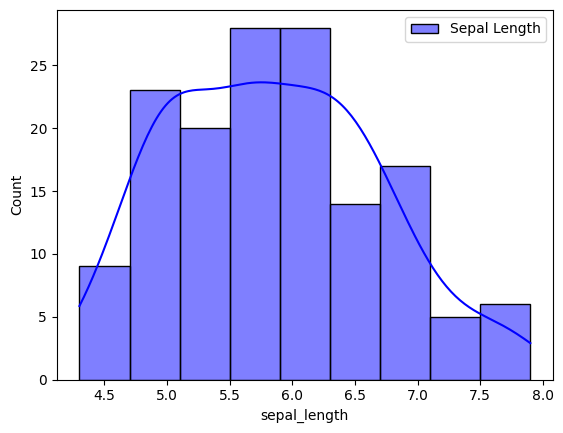

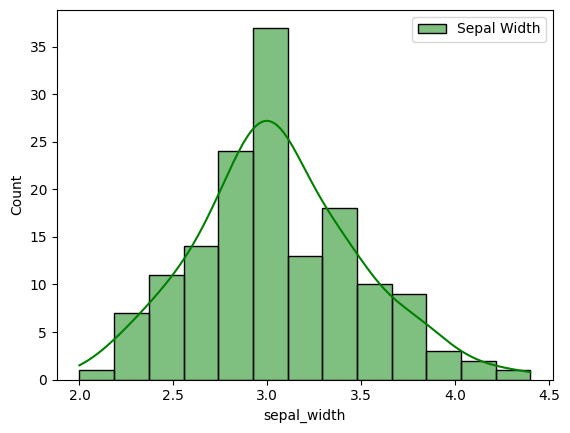

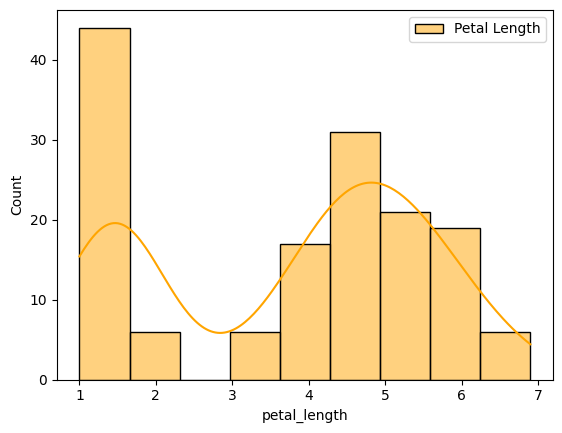

In [9]:
### Histograms for selected feature
# Histograms for sepal_length
sns.histplot(data['sepal_length'], kde=True, color='blue', label='Sepal Length')
plt.legend()
plt.show()

# Histograms for sepal_width
sns.histplot(data['sepal_width'], kde=True, color='green', label='Sepal Width')
plt.legend()
plt.show()

# Histograms for petal_length
sns.histplot(data['petal_length'], kde=True, color='orange', label='Petal Length')
plt.legend()
plt.show()

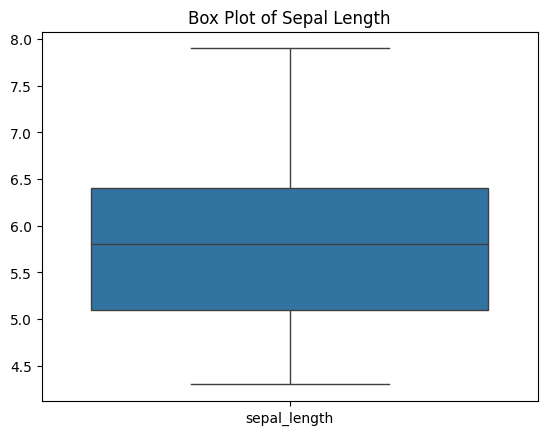

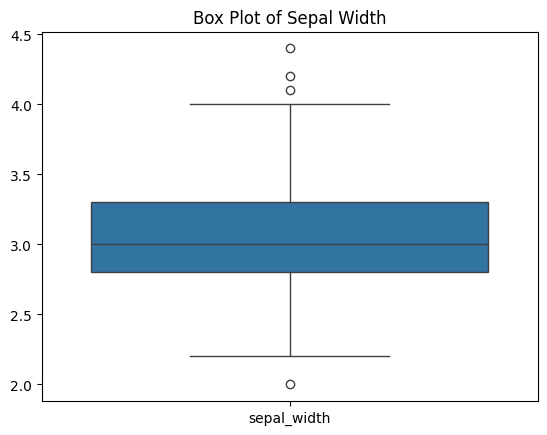

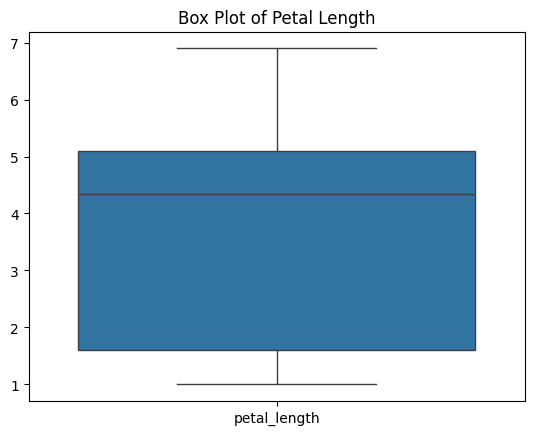

In [10]:
### Box plots for selected features
# Box plots for sepal_length
sns.boxplot(data=data[['sepal_length']])
plt.title('Box Plot of Sepal Length')
plt.show()

# Box plots for sepal_width
sns.boxplot(data=data[['sepal_width']])
plt.title('Box Plot of Sepal Width')
plt.show()

# Box plots for petal_length
sns.boxplot(data=data[['petal_length']])
plt.title('Box Plot of Petal Length')
plt.show()

### Detailed Analysis
Provide a detailed analysis of each selected variable in this section.


**Feature Analysis:**

> The features `sepal_length`, `sepal_width`, and `petal_length` where chosen for this analysis.


1.	Sepal Length:
  +	The fairly normal distribution of sepal length suggests that this feature is well-balanced across the dataset. Most of the data points are concentrated around the median with no extreme outliers, indicating that the range of sepal length is fairly consistent across the different species of iris plants.
  +	The variability shown in the boxplot might suggest that while the central tendency is clear, there are still considerable differences in sepal lengths among individual instances. This variability could help in distinguishing between different species when combined with other features.

2.	Sepal Width:
  +	The narrow range and tight distribution of sepal width indicate less variability within this feature compared to others, which might suggest that sepal width alone may not be as strong a distinguishing feature between species as sepal length or petal length.
  +	The presence of a few outliers on the higher end suggests that certain species may exhibit distinctly larger sepal widths, which could be an interesting point of distinction in further analysis.

3.	Petal Length:
  +	The petal length shows the greatest variability and is not normally distributed. This suggests that petal length is a key distinguishing factor between iris species. The wide range (from 1 to 7) and the presence of many small values (potential outliers) indicate that certain species may have significantly smaller or larger petal lengths compared to others.
  +	The large spread of the boxplot highlights that petal length can vary significantly, making it a potentially important feature for classification tasks. Species with longer petals may show a different clustering compared to species with shorter petals.

General Insights:

  +	Key Features for Classification: Petal length seems to be a strong distinguishing feature among the species in the Iris dataset due to its wide range and variability. On the other hand, sepal length and sepal width appear to be more consistent across the dataset but could still play a complementary role when combined with petal length.
  +	Feature Interaction: While some individual features show normal distributions, combining them (e.g., through pair plots or multivariate analysis) might reveal stronger patterns of separation between species. Petal length, in particular, is likely to be a critical feature for identifying species distinctions.
  +	Outliers and Distribution: The presence of outliers, especially in petal length and sepal width, suggests that certain iris species may exhibit distinct physical characteristics, which could be helpful in species identification.
  + In summary, the dataset contains both features with low variability (e.g., sepal width) and high variability (e.g., petal length), allowing for a comprehensive approach to species classification.

## Feature Encoding
Discuss and apply one-hot encoding vs. ordinal encoding. Identify which features should be encoded in which way.

**Discussion:**

1. One-hot encoding
  - One-hot encoding is used for categorical features which do not have any order such as `species`. It creates binary columns for each category, where the presence of a category is marked as 1, and absence as 0.
  - The correct approach for the `species` feature is one-hot encoding because there is no inherent order among the species.

2. Ordinal encoding
  - Ordinal encoding is normally used for categorical features that have some sort of hirachie such as `small`, `medium` and `large`. It assigns Integers to all features, to represent the hirachie.
  - In this particular dataset, no feature requires ordinal encoding because no variables represent ordered categories. However, in other contexts with ordinal variables (e.g. size, rank, education level, customer satisfaction ratings), ordinal encoding could be used to preserve the hierarchy between categories.



In [17]:
# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[['species']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['species']))
data_encoded = pd.concat([data.drop('species', axis=1), encoded_df], axis=1)
print(data_encoded.head())

   sepal_length  sepal_width  petal_length  petal_width  \
0           5.1          3.5           1.4          0.2   
1           4.9          3.0           1.4          0.2   
2           4.7          3.2           1.3          0.2   
3           4.6          3.1           1.5          0.2   
4           5.0          3.6           1.4          0.2   

   sepal_length_normalized  sepal_width_normalized  petal_length_normalized  \
0                 0.222222                0.625000                 0.067797   
1                 0.166667                0.416667                 0.067797   
2                 0.111111                0.500000                 0.050847   
3                 0.083333                0.458333                 0.084746   
4                 0.194444                0.666667                 0.067797   

   petal_width_normalized  sepal_length_standardized  \
0                0.041667                  -0.900681   
1                0.041667                  -1.143017   
2 

## Normalization
Normalize the 'sepal_length' feature using Min-Max Scaling and Standard Scaling.

**Normalization Discussion:**

- Because the ranges of these features differ significantly, normalizing them is crucial to ensure that no feature disproportionately influences the model.

- If using models like K-Nearest Neighbors (KNN), which rely on distance metrics, normalization ensures that each feature contributes equally to the distance calculations. Without normalization, features like petal length (with a larger range) could dominate the model’s decision-making process, while features like sepal width (with a smaller range) would have less influence.

- Normalizing the features ensures that all of them fall within the same range (usually [0,1]), which guarantees that no feature artificially has more importance due to its range or units. For example, in KNN, this ensures that all features contribute equally when calculating the Euclidean distance between data points, leading to better model performance and accuracy.

- In conclusion, all numeric features in the Iris dataset (sepal length, sepal width, petal length, and petal width) should be normalized because they have different ranges and units. Normalization ensures that they contribute equally to the model, particularly in distance-based algorithms.

In [18]:
# Normalization using Min-Max Scaling
scaler_min_max = MinMaxScaler()
data['sepal_length_normalized'] = scaler_min_max.fit_transform(data[['sepal_length']])
print("Min-Max Normalized:")
print(data[['sepal_length', 'sepal_length_normalized']].head())

data['sepal_width_normalized'] = scaler_min_max.fit_transform(data[['sepal_width']])
print("Min-Max Normalized:")
print(data[['sepal_width', 'sepal_width_normalized']].head())

data['petal_length_normalized'] = scaler_min_max.fit_transform(data[['petal_length']])
print("Min-Max Normalized:")
print(data[['petal_length', 'petal_length_normalized']].head())

data['petal_width_normalized'] = scaler_min_max.fit_transform(data[['petal_width']])
print("Min-Max Normalized:")
print(data[['petal_width', 'petal_width_normalized']].head())

print('-' * 50)

# Standardization using Standard Scaler
scaler_standard = StandardScaler()
data['sepal_length_standardized'] = scaler_standard.fit_transform(data[['sepal_length']])
print("Standard Normalized:")
print(data[['sepal_length', 'sepal_length_standardized']].head())

data['sepal_width_standardized'] = scaler_standard.fit_transform(data[['sepal_width']])
print("Standard Normalized:")
print(data[['sepal_width', 'sepal_width_standardized']].head())

data['petal_length_standardized'] = scaler_standard.fit_transform(data[['petal_length']])
print("Standard Normalized:")
print(data[['petal_length', 'petal_length_standardized']].head())

data['petal_width_standardized'] = scaler_standard.fit_transform(data[['petal_width']])
print("Standard Normalized:")
print(data[['petal_width', 'petal_width_standardized']].head())

Min-Max Normalized:
   sepal_length  sepal_length_normalized
0           5.1                 0.222222
1           4.9                 0.166667
2           4.7                 0.111111
3           4.6                 0.083333
4           5.0                 0.194444
Min-Max Normalized:
   sepal_width  sepal_width_normalized
0          3.5                0.625000
1          3.0                0.416667
2          3.2                0.500000
3          3.1                0.458333
4          3.6                0.666667
Min-Max Normalized:
   petal_length  petal_length_normalized
0           1.4                 0.067797
1           1.4                 0.067797
2           1.3                 0.050847
3           1.5                 0.084746
4           1.4                 0.067797
Min-Max Normalized:
   petal_width  petal_width_normalized
0          0.2                0.041667
1          0.2                0.041667
2          0.2                0.041667
3          0.2                0.041667

## Correlation Analysis
Study the correlation of each feature using pair plots.

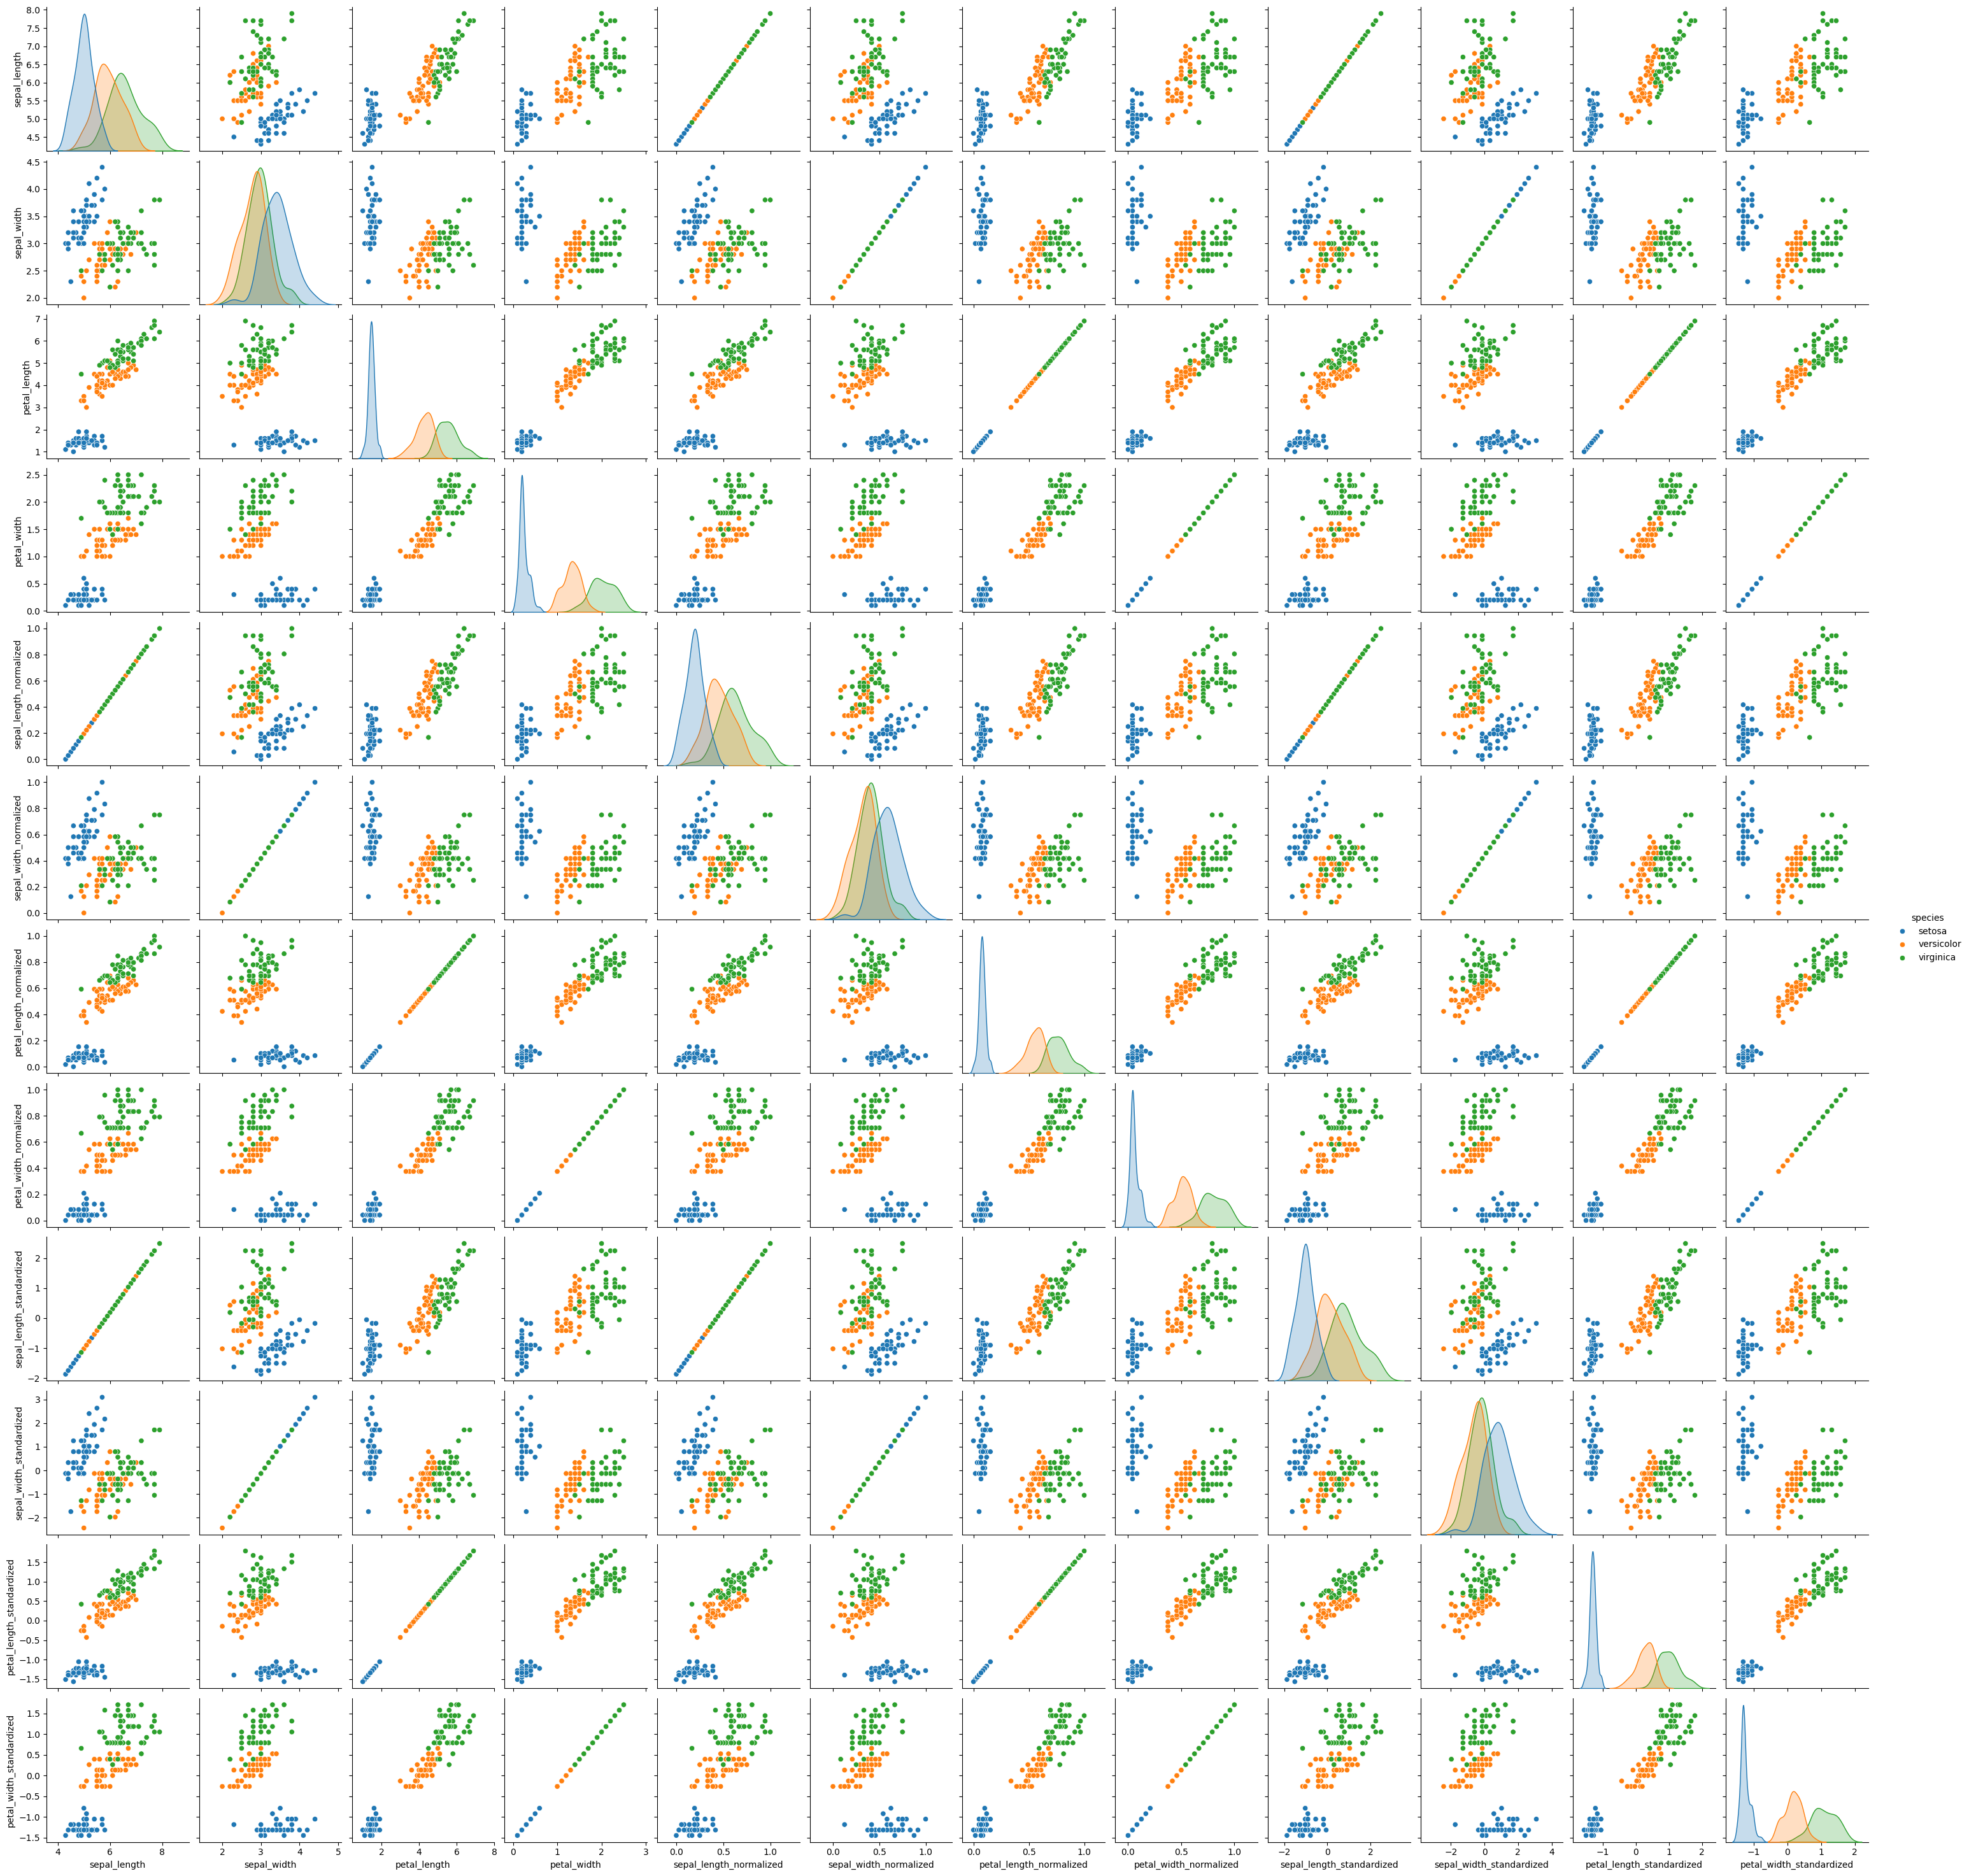

In [19]:
# Pair plot for correlation analysis
sns.pairplot(data, hue='species')
plt.show()

**Corrolation Analysis:**


+ The Petal Length vs. Petal Width plot shows a strong positive correlation between petal length and petal width. As petal length increases, petal width tends to increase as well. This linear relationship is very pronounced and indicates that these two features are closely related. This could suggest that they carry similar information, which could affect model performance if both are included without careful consideration. A high correlation between features could lead to redundancy, making feature selection important in reducing dimensionality and preventing multicollinearity in certain models.

+ There’s a moderate positive correlation between sepal length and petal length. While not as strong as the previous pair, this relationship suggests that as the sepal length increases, petal length generally increases as well. The correlation, however, is less tight, indicating more variability in this relationship.

+ The Sepal Width vs. Petal Length plot shows a weak or no clear correlation between sepal width and petal length. Unlike the previous pairs, this indicates that these two features are not related to each other. This could suggest that sepal width provides information independent of petal length and could add useful variability to a model.

+ When the pair plots are colored by species, you can see that species like Setosa are well-separated from others across most features, especially petal length and petal width. This indicates that these features are highly predictive of class labels.

+ The strong correlation between certain features (e.g., petal length and width) suggests that feature engineering or dimensionality reduction techniques like Principal Component Analysis (PCA) could be beneficial to avoid redundancy. Conversely, weakly correlated features like sepal width could introduce diversity, contributing positively to the model’s performance.

**Terms to keep in mind for the course:**

+ Dimensions represent the number of features.
+ Correlated/uncorrelated refers to whether features vary together or independently.
+ PCA is a technique to reduce the number of dimensions while keeping important information.
+ Dimensionality reduction helps simplify the data for better modeling.
+ Feature engineering creates or selects the best features to improve model accuracy.


> For example, in the Iris dataset, petal length and petal width are highly correlated, so we might reduce the dimensionality by using PCA to combine these two into a single feature that captures their variance. This helps simplify the dataset and reduce the complexity of the model




## Handling Special Cases in Data
Discuss handling zip code as a categorical or numerical feature.

**Discussion:**

In the context of housing data, a variable like zip code should generally be treated as a categorical feature, not a numerical one. Zip codes represent geographic regions, but their numeric values don’t carry a mathematical meaning (i.e., a zip code of 90210 isn’t "greater" or "lesser" than 10001). If treated as a numerical feature, models might interpret the zip code differences incorrectly as meaningful distances, which would distort predictions. In such cases, one-hot encoding would be appropriate, as it would treat each zip code as a distinct category, similar to how we handled the `species` variable in the Iris dataset in the notebook. This ensures that zip codes are correctly treated as unique identifiers without imposing any artificial order or relationship.

## Reflection
Reflect on the learning from this project, challenges faced, and insights gained.

**My Thoughts:**

Throughout this project, I have gained valuable insights into both the Iris dataset and key data preprocessing techniques. Here are the main takeaways:

1. Understanding the Iris Dataset: Working with the Iris dataset provided a solid introduction to how data can be structured for machine learning tasks. I learned to identify and analyze important features like sepal and petal dimensions, and how these contribute to distinguishing between different species.

2. Data Preprocessing: I now recognize how crucial data preprocessing is in the machine learning pipeline. Techniques like normalization, feature encoding, and correlation analysis are essential for ensuring that the model interprets the data correctly. For instance, I applied one-hot encoding to the categorical species feature and normalized continuous variables like sepal length and petal width to make sure all features contributed equally during model training.

4.	Drawing Conclusions from Raw Data: By analyzing the raw data, I learned to draw meaningful conclusions about the distribution of features and their correlations. This helped me better understand how data characteristics can influence modeling outcomes.

5.	Challenges: One challenge I still face is balancing the complexity of feature engineering with dimensionality reduction. While I understand the need for simplification, it’s still challenging to determine when to apply techniques like PCA without losing valuable information.

> Overall, this project deepened my understanding of data preprocessing, feature engineering, and the importance of selecting the right techniques for building effective machine learning models.


